### The Stanford Data Project Analysis - Nashville, TN
On a typical day in the United States, police officers make more than 50,000 traffic stops. Our team is gathering, analyzing, and releasing records from millions of traffic stops by law enforcement agencies across the country. Our goal is to help researchers, journalists, and policymakers investigate and improve interactions between police and the public.

### 1. Purpose-of-Analysis
The purpose of the analysis is kind of hollistic approach to explore what we can get out of the data, so I am not sure if there is a specific purpose or question. I will insert all the questions that come to my mind below and will update this notebook frequently. So there are couple of questions we are trying to answer here:
#### 1.1. Is being arrested a gender dependeant?
#### 1.2 Is being arrested a race dependeant? 
#### 1.3 How the race distribution looks like comparing with the actual city race distribution?
#### 1.4. Is the weather a playing factor of increasing/decreasing the tickets rates?
#### 1.5 how the spatial distribution of the tickets looks  like?
#### 1.6 How the spatial distribution of the tickets and gender looks like?
#### 1.7 Do girls make violations at a specific time of the day?
#### 1.8 How the type of violation is distributed around the city?
#### 1.9 Are there any places in the city where speeding is the most common violation?

### 2. Data aquisition
The data of the project is in a form of compressed file hosted online, it will be downloaded and extracted to the project directory. You can always host the data anywhere else and change the pointer in the read csv  line

In [34]:
import datetime
import pandas as pd
import requests, zipfile, io

In [1]:
def fileReducer(file,reducedSize):
    """ Takes fullsize csv file and randomly sample it to the given size"""
    import pandas as pd
    df=pd.read_csv(file)
    dfFullSize=df.memory_usage().sum()/1e6
    df_reduced=df.sample(frac=reducedSize/(1.4*dfFullSize))
    df_reduced.to_csv('df_reduced.csv')

In [ ]:
url="https://stacks.stanford.edu/file/druid:hp256wp2687/hp256wp2687_tn_nashville_2019_08_13.csv.zip"

In [ ]:
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()
tn_raw=pd.read_csv(z.namelist()[0], low_memory=False)

In [3]:
fileReducer('tn_nashville_2019_08_13.csv',200)

C:\Users\amalattar\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3249: DtypeWarning: Columns (6,8,15,16,17,22,23,24,25,29,30,31,32,33,35,36,37,38,40,41) have mixed types. Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [35]:
tn_raw=pd.read_csv('df_reduced.csv', parse_dates=[['date', 'time']])

C:\Users\amalattar\AppData\Roaming\Python\Python36\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7,9,16,17,18,23,24,25,26,31,33,36,37,38,39,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
tn=tn_raw.copy()

### 3. Data Exploration and Cleaning
In this step we will select the column of interest and  will drop all the na values in these columns. We will also drop the columns that we won't need or use.

In [6]:
tn.head()

,date_time,Unnamed: 0,raw_row_number,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,subject_sex,officer_id_hash,type,violation,arrest_made,citation_issued,warning_issued,outcome,contraband_found,contraband_drugs,contraband_weapons,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_registration_state,notes,raw_verbal_warning_issued,raw_written_warning_issued,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
0,2015-01-15 13:27:00,431346,1997429,"I 65 S & I 24 ENTRY W, NASHVILLE, TN, 37207",35.727554,-86.960493,2,18041.0,223.0,26.0,white,female,498350de5b,vehicular,moving traffic violation,False,True,False,citation,NaN,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,I WAS RUNNING STATIONARY LASER ON THE SHOULDER...,False,False,True,False,N,False,False,False,False,False,False,False
1,2012-11-15 23:20:00,268994,1086459,"ANTIOCH PIKE & NOLENSVILLE PIKE, NASHVILLE, TN...",36.101784,-86.740543,8,8515.0,831.0,45.0,black,female,3a4171e2e6,vehicular,vehicle equipment violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,tint,True,False,False,False,N,False,False,False,False,False,False,False
2,2013-09-01 23:47:00,2902086,1437304,"E OLD HICKORY BLVD & SANDHURST DR, MADISON, TN...",36.261688,-86.677991,7,1635.0,713,45.0,black,female,4ff9d8c9ea,vehicular,vehicle equipment violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,vehicle equipment violation,TN,NaN,True,False,False,False,N,False,False,False,False,False,False,False
3,2010-03-05 17:20:00,1730535,136138,"BRILEY PKWY & MCGAVOCK PIKE, NASHVILLE, TN, 37214",36.153834,-86.685459,5,9290.0,515,31.0,white,female,b1a0b13693,vehicular,moving traffic violation,False,False,True,warning,NaN,NaN,NaN,False,False,False,False,NaN,moving traffic violation,TN,NO MDC\n,True,False,False,NaN,N,False,False,False,False,False,False,False
4,2011-10-29 00:34:00,142519,636210,"711 RIVERGATE PKWY, GOODLETTSVILLE, TN, 37072",36.305207,-86.703369,7,1753.0,727.0,28.0,white,male,4ff9d8c9ea,vehicular,vehicle equipment violation,True,False,True,arrest,False,False,False,True,True,True,True,consent,vehicle equipment violation,TN,NaN,True,False,False,NaN,N,True,False,True,True,False,False,False


In [7]:
tn.shape

(434216, 42)

In [8]:
tn.columns

Index(['date_time', 'Unnamed: 0', 'raw_row_number', 'location', 'lat', 'lng',
       'precinct', 'reporting_area', 'zone', 'subject_age', 'subject_race',
       'subject_sex', 'officer_id_hash', 'type', 'violation', 'arrest_made',
       'citation_issued', 'warning_issued', 'outcome', 'contraband_found',
       'contraband_drugs', 'contraband_weapons', 'frisk_performed',
       'search_conducted', 'search_person', 'search_vehicle', 'search_basis',
       'reason_for_stop', 'vehicle_registration_state', 'notes',
       'raw_verbal_warning_issued', 'raw_written_warning_issued',
       'raw_traffic_citation_issued', 'raw_misd_state_citation_issued',
       'raw_suspect_ethnicity', 'raw_driver_searched',
       'raw_passenger_searched', 'raw_search_consent', 'raw_search_arrest',
       'raw_search_warrant', 'raw_search_inventory', 'raw_search_plain_view'],
      dtype='object')

#### Removing the uneeded columns

In [9]:
tn=tn.iloc[:,[0,1,2,4,5,9,10,11,13,14,15,16,17,18,19,20,21,22,23,24,]]

In [10]:
tn.columns

Index(['date_time', 'Unnamed: 0', 'raw_row_number', 'lat', 'lng',
       'subject_age', 'subject_race', 'subject_sex', 'type', 'violation',
       'arrest_made', 'citation_issued', 'warning_issued', 'outcome',
       'contraband_found', 'contraband_drugs', 'contraband_weapons',
       'frisk_performed', 'search_conducted', 'search_person'],
      dtype='object')

#### Checking for the nulls in each column

In [11]:
tn.isnull().sum()

date_time                  0
Unnamed: 0                 0
raw_row_number             0
lat                    26156
lng                    26156
subject_age              118
subject_race             273
subject_sex             1804
type                       0
violation               1096
arrest_made                5
citation_issued           40
warning_issued            48
outcome                  254
contraband_found      416356
contraband_drugs      416356
contraband_weapons    416356
frisk_performed            3
search_conducted          10
search_person             10
dtype: int64

#### Setting Date as index

In [37]:
tn.set_index('date_time',inplace=True)

In [7]:
tn.head()

,Unnamed: 0,raw_row_number,location,lat,lng,precinct,reporting_area,zone,subject_age,subject_race,...,raw_traffic_citation_issued,raw_misd_state_citation_issued,raw_suspect_ethnicity,raw_driver_searched,raw_passenger_searched,raw_search_consent,raw_search_arrest,raw_search_warrant,raw_search_inventory,raw_search_plain_view
date_time,,,,,,,,,,,,,,,,,,,,,
2015-01-15 13:27:00,431346,1997429,"I 65 S & I 24 ENTRY W, NASHVILLE, TN, 37207",35.727554,-86.960493,2,18041.0,223.0,26.0,white,...,True,False,N,False,False,False,False,False,False,False
2012-11-15 23:20:00,268994,1086459,"ANTIOCH PIKE & NOLENSVILLE PIKE, NASHVILLE, TN...",36.101784,-86.740543,8,8515.0,831.0,45.0,black,...,False,False,N,False,False,False,False,False,False,False
2013-09-01 23:47:00,2902086,1437304,"E OLD HICKORY BLVD & SANDHURST DR, MADISON, TN...",36.261688,-86.677991,7,1635.0,713,45.0,black,...,False,False,N,False,False,False,False,False,False,False
2010-03-05 17:20:00,1730535,136138,"BRILEY PKWY & MCGAVOCK PIKE, NASHVILLE, TN, 37214",36.153834,-86.685459,5,9290.0,515,31.0,white,...,False,NaN,N,False,False,False,False,False,False,False
2011-10-29 00:34:00,142519,636210,"711 RIVERGATE PKWY, GOODLETTSVILLE, TN, 37072",36.305207,-86.703369,7,1753.0,727.0,28.0,white,...,False,NaN,N,True,False,True,True,False,False,False


#### 1.1. Is being arrested a gender dependeant?

In [79]:
tn.subject_sex.value_counts(normalize=0)

male      256696
female    175716
Name: subject_sex, dtype: int64

In [80]:
#tn.arrest_made[tn.arrest_made.notnull()]=tn.arrest_made[tn.arrest_made.notnull()].astype('int64')

In [81]:
tn.dropna(subset=['arrest_made'], inplace=True)

In [84]:
tn.arrest_made=tn.arrest_made.astype(int)

In [102]:
tn.groupby('subject_sex').arrest_made.sum()/tn.subject_sex.value_counts()*100

female    1.053985
male      2.033168
dtype: float64

#### 1.2 Is being arrested a race dependeant? 

In [41]:
(tn.groupby('subject_race').arrest_made.sum()/tn.subject_race.value_counts()).sort_values(ascending=False)*100

hispanic                  3.081764
black                     2.282372
other                     1.165981
white                     1.091196
asian/pacific islander    0.642978
unknown                   0.519331
dtype: float64

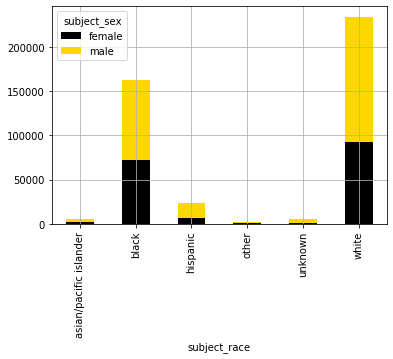

In [100]:
death_counts = pd.crosstab([tn.subject_race], tn.subject_sex)
death_counts.plot.bar(stacked=True, color=['black','gold'], grid=True)